In [1]:
import numpy as np 
import matplotlib.pyplot as plt


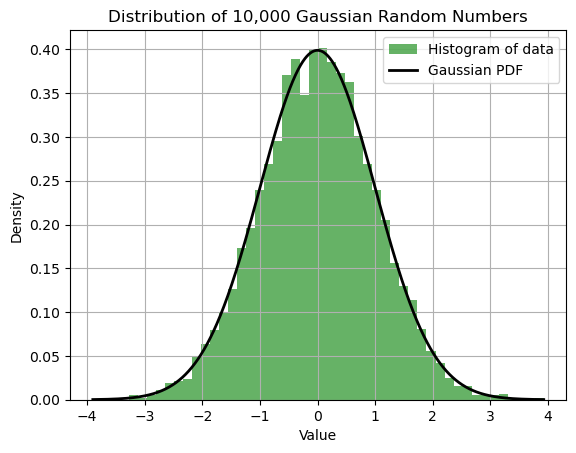

In [9]:
#Q1
mean = 0
std_dev = 1
size = 10000

# Generate 10,000 Gaussian random numbers
data = np.random.normal(mean, std_dev, size)

# Plot histogram of data with density=True to normalize
count, bins, ignored = plt.hist(data, bins=50, density=True, alpha=0.6, color='green', label='Histogram of data')

# Calculate Gaussian PDF manually
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Plot the Gaussian PDF curve
plt.plot(x, pdf, 'black',  linewidth=2, label='Gaussian PDF')

plt.title('Distribution of 10,000 Gaussian Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Q2 DIRECT WAY 

import numpy as np
#x0 = initial , eps = error 

def jacobi(x0, y0, z0, eps=0.01, max_iter=100):
    x, y, z = x0, y0, z0
    for iteration in range(max_iter):
        x_new = (14 - 3*y + 3*z) / 8
        y_new = -(5 + 2*x - 5*z) / 8
        z_new = (-8 - 3*x - 5*y) / 10

      #  print("x= ",x_new, "y= ",y_new, "z= ", z_new)
        
        # Check convergence
        if max(abs(x_new - x), abs(y_new - y), abs(z_new - z)) < eps:
            return (x_new, y_new, z_new), iteration + 1
        
        x, y, z = x_new, y_new, z_new
    return (x, y, z), max_iter

def gauss_seidel(x0, y0, z0, eps=0.01, max_iter=100):
    x, y, z = x0, y0, z0
    for iteration in range(max_iter):
        x_new = (14 - 3*y + 3*z) / 8
        y_new = -(5 + 2*x_new - 5*z) / 8   # Note use of x_new here
        z_new = (-8 - 3*x_new - 5*y_new) / 10  # use updated x_new and y_new

        
   #     print("x= ",x_new, "y= ",y_new, "z= ", z_new)
        
        if max(abs(x_new - x), abs(y_new - y), abs(z_new - z)) < eps:
            return (x_new, y_new, z_new), iteration + 1
        
        x, y, z = x_new, y_new, z_new
    return (x, y, z), max_iter


# Initial guess
x0, y0, z0 = 0, 0, 0
epsilon = 0.01

# Solve using Jacobi
jacobi_solution, jacobi_iters = jacobi(x0, y0, z0, epsilon)
print( )
print(f"Jacobi method solution: x={jacobi_solution[0]:.4f}")
print(f"y={jacobi_solution[1]:.4f}")
print(f"z={jacobi_solution[2]:.4f} after {jacobi_iters} iterations")

print( )
# Solve using Gauss-Seidel
gs_solution, gs_iters = gauss_seidel(x0, y0, z0, epsilon)
print( )
print(f"Gauss-Seidel method solution: x={gs_solution[0]:.4f}")
print(f"y={gs_solution[1]:.4f}")
print(f"z={gs_solution[2]:.4f} after {gs_iters} iterations")

# Which is more efficient?
if jacobi_iters > gs_iters:
    print("Gauss-Seidel method converges faster and is more efficient.")
elif jacobi_iters < gs_iters:
    print("Jacobi method converges faster and is more efficient.")
else:
    print("Both methods converge in the same number of iterations.")



Jacobi method solution: x=2.0889
y=-1.5517
z=-0.6537 after 12 iterations


Gauss-Seidel method solution: x=2.0911
y=-1.5520
z=-0.6513 after 7 iterations
Gauss-Seidel method converges faster and is more efficient.


In [19]:
#Q3 BETTER WAY WITH MATRICES
import numpy as np

def jacobi(A, b, x0, eps=1e-2, max_iter=100):
    n = len(b)
    x = x0.copy()
    
    for iteration in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            sum_ = 0
            for j in range(n):
                if j != i:
                    sum_ += A[i, j] * x[j]
            x_new[i] = (b[i] - sum_) / A[i, i]
        
        # Check convergence (max absolute difference)
        if np.linalg.norm(x_new - x, ord=np.inf) < eps:
            return x_new, iteration + 1
        x = x_new
    
    return x, max_iter

def gauss_seidel(A, b, x0, eps=1e-2, max_iter=100):
    n = len(b)
    x = x0.copy()
    
    for iteration in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            sum1 = sum(A[i, j] * x[j] for j in range(i))  # use updated x for j < i
            sum2 = sum(A[i, j] * x_old[j] for j in range(i + 1, n))  # use old x for j > i
            
            x[xi] = (b[i] - sum1 - sum2) / A[i, i]
        
        # Check convergence
        if np.linalg.norm(x - x_old, ord=np.inf) < eps:
            return x, iteration + 1
    
    return x, max_iter

#inputting the equations as matrix 
A = np.array([
    [8, 3, -3],
    [2, 8, -5],
    [3, 5, 10]
])
b = np.array([14, -5, -8])
x0 = np.zeros(3)

x_jacobi, iter_jacobi = jacobi(A, b, x0)
print("Jacobi solution:", x_jacobi, "in", iter_jacobi, "iterations")

x_gs, iter_gs = gauss_seidel(A, b, x0)
print("Gauss-Seidel solution:", x_gs, "in", iter_gs, "iterations")


Jacobi solution: [ 2.08886841 -1.55169515 -0.65368142] in 12 iterations
Gauss-Seidel solution: [ 2.09110925 -1.55204425 -0.65131065] in 7 iterations


We want to simulate 5000 such particles moving randomly, and then:

Find the average velocity of all particles over time.

Find the mean squared displacement (MSD), basically, how far on average particles have moved from their starting points as time passes.

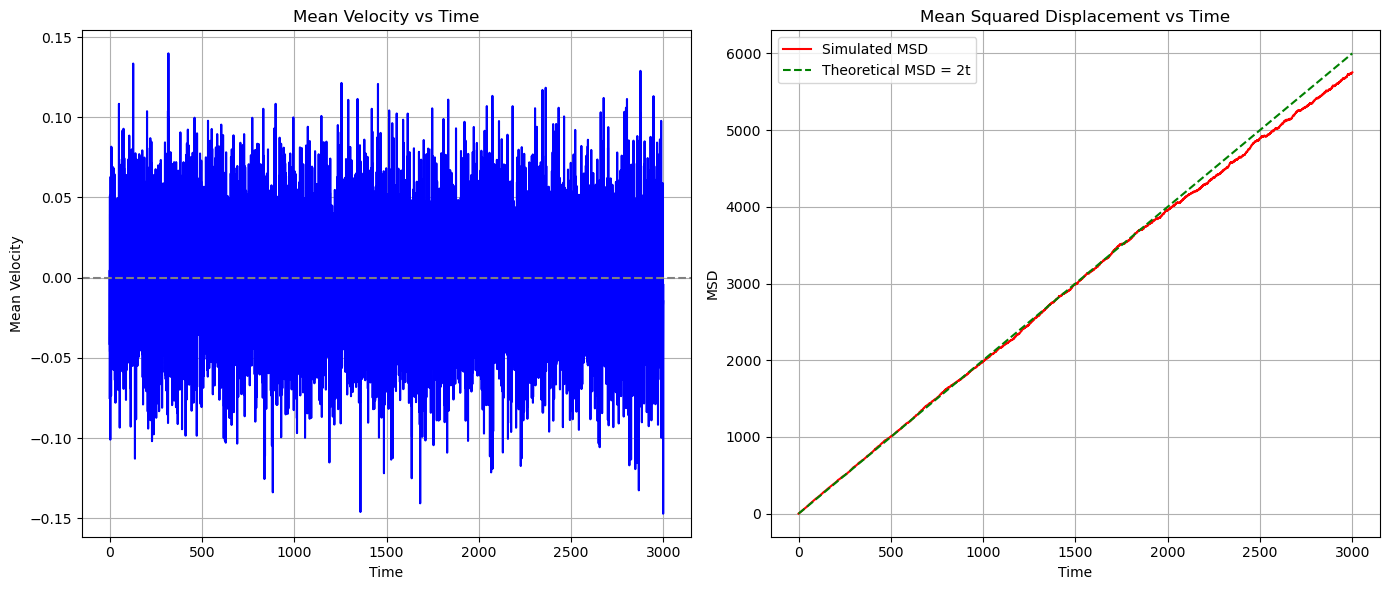

In [48]:
#Q3
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta = 1
kB = 1
T = 1
B = eta * kB * T  # =1
n_particles = 5000
dt = 0.3
n_steps = 10000

# Initial positions between 0 and 1
x = np.random.uniform(0, 1, n_particles)
x0 = x.copy()

mean_velocities = []
msd = []

for step in range(n_steps):
    # Gaussian random increment: sqrt(2B * dt) * N(0,1)
    dx = np.sqrt(2 * B * dt) * np.random.randn(n_particles)
    
    # Update positions 
    x += dx / eta
    
    # Mean velocity (approximate as delta x / dt)
    mean_v = np.mean((dx / dt))
    mean_velocities.append(mean_v)
    
    # Mean squared displacement
    msd.append(np.mean((x - x0)**2))

# Time array for plotting
time = np.arange(n_steps) * dt

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(time, mean_velocities, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Mean Velocity vs Time')
plt.xlabel('Time')
plt.ylabel('Mean Velocity')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(time, msd, label='Simulated MSD', color='red')
plt.plot(time,2* time, '--', label='Theoretical MSD = 2t', color='green')
plt.title('Mean Squared Displacement vs Time')
plt.xlabel('Time')
plt.ylabel('MSD')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
